# Цели и задачи:

 Цель: Необходимо провести анализ результатов работы подразделения по итогам ноября с целью оптимизации формы и содержания отчетности.

   1. Выполнить предобработку данных;

   2. определить сколько заявок поступало в разрезе дней;

   3. вычислить сколько каждый инженер получает заявок в течение месяца;

   4. определить способы получения заявок;

   5. проанализировать способы поступления заявок;

   6. представить заявки в разрезе населенных пунктов;

   7. соотнести модель оборудования и количество заявок;

   8. указать признак удаленной поддержки да/нет.
  
  Оформить выводы.

## Описание признакового пространства 
По каждому инциденту доступны следующие признаки. 

|Признак|Описание признака|
|-------------:|:------------|
|Дата заявки|Дата|
|Тип заявки|канал связи, через который поступила|
|Автор заявки|фио сотрудника, который заносит в базу|
|Заявка через дежурного или инженеру напрямую| должность, через которое поступила заявка|
|Ответственный механик|Ответственный механик фио|
|Инженер по сервису|фио сотрудника|
|Инженер THD|Инженер THD фио|
|Производитель|название фирмы-производителя|
|Номер оборудования|номер, закрепленный в системе за конкретным оборудованием|
|Город|Город|
|Тема заявки|Тема заявки в свободной форме|
|Состояние заявки|статус о выполнении|
|Удаленная поддержка|Удаленная поддержка оказывалась или нет|
|Дата закрытия|Дата закрытия заявки|


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 

In [ ]:
df = pd.read_excel('call_november2.xlsx')
df.head()

,Дата заявки,Тип заявки,Автор заявки,Заявка через дежурного или инженеру напрямую,Ответственный механик,Инженер по сервису,Инженер THD,Производитель,Номер оборудования,Город,Тема заявки,Состояние заявки,Удаленная поддержка,Дата закрытия
0,2022-11-01,почта,Журавлев Александр,NaN,Чекулин Александр,Мельник Дмитрий,Журавлев Александр,KONE,40262019,Москва,"KONE, KRM, Исправить замечания клиента.",Выполнено,NaN,2022-11-02 00:00:00
1,2022-11-01,телефон,Журавлев Александр,NaN,Петров Илья,Захаров Степан,Журавлев Александр,ЩЛЗ,NaN,"МО, г. Раменское","Привод ДК EcoDrive, не работает механический р...",Выполнено,да,2022-11-01 00:00:00
2,2022-11-01,телефон,Пластинин Сергей,инженеру,Антошин Руслан,NaN,Пластинин Сергей,OTIS,B7NS7755,Волгоград,OTIS. При попытке старта двигается рывками.,жду обратную связь от механика,NaN,NaN
3,2022-11-01,телефон,Павлов.Д.А.,NaN,Дмитрий Черепанов.,Кузнецов Антон.,Павлов Денис,УЛ.,44857101,Санкт - Петербург,На лифте в момент старта дёргаются пускатели.,Удержание.,Нет,NaN
4,2022-11-01,почта,Железнов,NaN,Артамонов Андрей,Коннов Андрей,Железнов Сергей,KONE,43009143,Москва,Скуд Kone Access определить модель и версии пр...,выполнено,нет,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Дата заявки                                   369 non-null    datetime64[ns]
 1   Тип заявки                                    369 non-null    object        
 2   Автор заявки                                  363 non-null    object        
 3   Заявка через дежурного или инженеру напрямую  312 non-null    object        
 4   Ответственный механик                         333 non-null    object        
 5   Инженер по сервису                            339 non-null    object        
 6   Инженер THD                                   369 non-null    object        
 7   Производитель                                 351 non-null    object        
 8   Номер оборудования                            314 non-null    object  

In [ ]:
print("""Количество дублирующихся записей 
в исходной датафрейме равно {}.
""".format(df.duplicated().sum())) 

Количество дублирующихся записей 
в исходной датафрейме равно 6.



In [ ]:
df[df.duplicated() == True] 

,Дата заявки,Тип заявки,Автор заявки,Заявка через дежурного или инженеру напрямую,Ответственный механик,Инженер по сервису,Инженер THD,Производитель,Номер оборудования,Город,Тема заявки,Состояние заявки,Удаленная поддержка,Дата закрытия
15,2022-11-02,телефон,Орлов А. В,NaN,Сергей Тытарь,NaN,Орлов Андрей,KONE,40133417,Санкт - Петербург,KONE. MONOSPACE,Выполнено,NaN,NaN
96,2022-11-10,телефон,Тучин Андрей,Инженер,Вашталов Александр,Линёв Андрей,Тучин Андрей,Orona,NaN,Сочи,Обь 7.2 - установка.,Выполнена,Нет,2022-11-10 00:00:00
126,2022-11-14,телефон,Тучин Андрей,Инженер,Золотов Алексей,Линёв Андрей,Тучин Андрей,Orona,NaN,Сочи,Обь 7.2 - установка.,Выполнена,Нет,2022-11-14 00:00:00
273,2022-11-24,телефон,Пластинин Сергей,инженеру,Поляков Алексей,Кузнецов Антон,Пластинин Сергей,МЛЗ,NaN,Санкт-Петербург,МЛЗ. Восстановление работы датчика 110%. Восст...,Выполнено,нет,2022-11-24 00:00:00
288,2022-11-25,Телефон,Клименко Е,Дежурный,Корнейчук Константин,Абдрафиков В,Лютиков Руслан,KONE,NaN,NaN,"ОБЬ, не работает контроль Вскрытие станции упр...",выполнено,да,2022-11-25 00:00:00
368,2022-11-30,телефон Лютиков Р.А.,NaN,Механик,Корнейчук К.,Виталий Абдрафиков,Лютиков Руслан,КОНЕ,40345554,Уфа,Лифт выходит из нормальной работы.,выполнена,да,2022-12-02 00:00:00


In [ ]:
df.columns = df.columns.str.lower() 

In [ ]:
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace('ё', 'е')

In [ ]:
df.head(1)

,дата_заявки,тип_заявки,автор_заявки_,заявка_через_дежурного_или_инженеру_напрямую,ответственный_механик,инженер_по_сервису,инженер_thd,производитель,номер_оборудования,город,тема_заявки,состояние_заявки,удаленная_поддержка,дата_закрытия
0,2022-11-01,почта,Журавлев Александр,NaN,Чекулин Александр,Мельник Дмитрий,Журавлев Александр,KONE,40262019,Москва,"KONE, KRM, Исправить замечания клиента.",Выполнено,NaN,2022-11-02 00:00:00


In [ ]:
import datetime

In [ ]:
df['дата_закрытия'] = pd.to_datetime(df['дата_закрытия'], errors='coerce')

In [ ]:
df['дата_закрытия'] = pd.to_datetime(df['дата_закрытия'], format='%d.%m.%Y')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   дата_заявки                                   369 non-null    datetime64[ns]
 1   тип_заявки                                    369 non-null    object        
 2   автор_заявки_                                 363 non-null    object        
 3   заявка_через_дежурного_или_инженеру_напрямую  312 non-null    object        
 4   ответственный_механик                         333 non-null    object        
 5   инженер_по_сервису                            339 non-null    object        
 6   инженер_thd                                   369 non-null    object        
 7   производитель                                 351 non-null    object        
 8   номер_оборудования                            314 non-null    object  

$\blacktriangleright$ Количество заявок в разрезе дней

In [ ]:
df.дата_заявки.value_counts()

2022-11-07    37
2022-11-30    34
2022-11-29    30
2022-11-15    26
2022-11-16    26
2022-11-23    19
2022-11-22    18
2022-11-21    17
2022-11-17    17
2022-11-10    16
2022-11-25    16
2022-11-14    15
2022-11-11    15
2022-11-24    15
2022-11-28    15
2022-11-08    14
2022-11-02    11
2022-11-18     8
2022-11-03     7
2022-11-09     6
2022-11-01     6
2022-11-20     1
Name: дата_заявки, dtype: int64

In [ ]:
df['дата_заявки1'] = df['дата_заявки'].dt.date

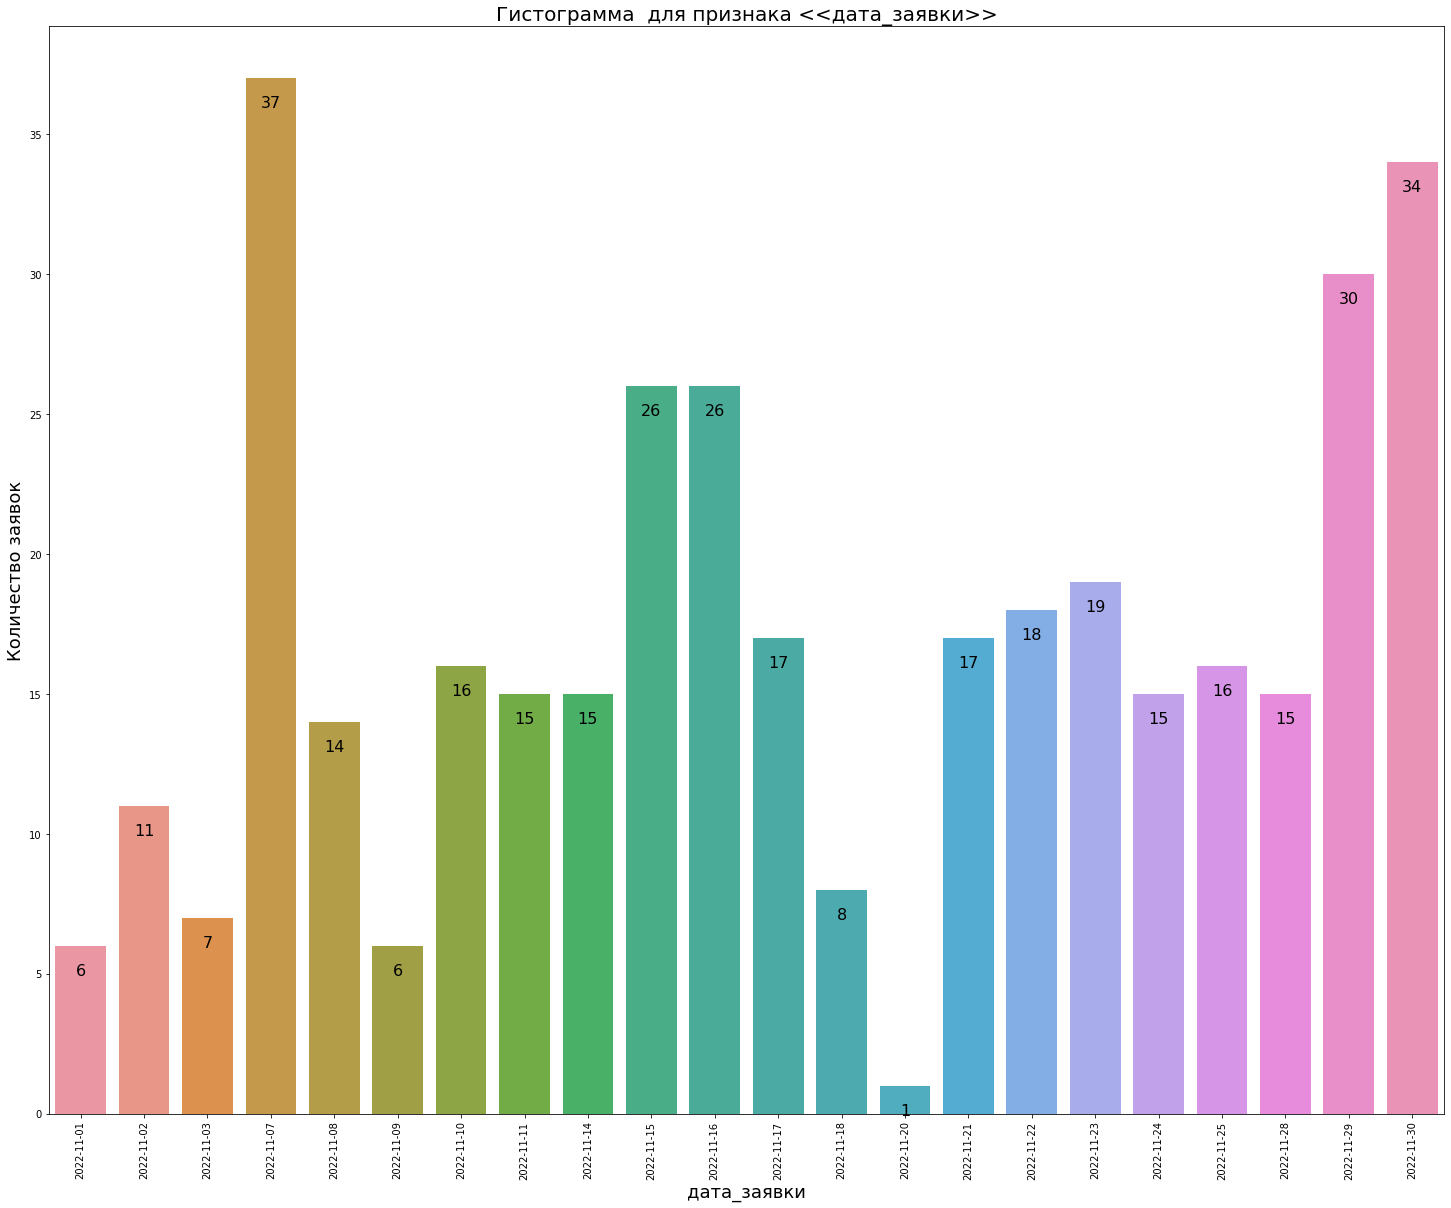

In [ ]:
plt.subplots(figsize = (25, 20), sharex=True)
ax=sns.countplot(x=df['дата_заявки1'], data=df);
plt.xlabel('дата_заявки', fontsize = 18)
plt.ylabel('Количество заявок', fontsize = 18)
plt.title('Гистограмма  для признака <<дата_заявки>>', fontsize = 20)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()),  ha='center', va='top', color='black', size=16)
plt.savefig('my_plot2.jpg')

$\blacktriangleright$ Сколько каждый инженер получает заявок в течение месяца

In [ ]:
col_cat = ['инженер_thd']
for col in col_cat:
    print('--------{}----'.format(col))
    print(df[col].unique())
    print('--------{}----'.format(col))

--------инженер_thd----
['Журавлев Александр' 'Пластинин Сергей' 'Павлов Денис' 'Железнов Сергей'
 'Орлов Андрей' 'Стольников О.Л.' 'Ищенко Владислав' 'Степанов Алексей'
 'Абрамов Н.В.' 'Пластинин Сергей, Меллех Лев' 'Тюбаев Михаил'
 'Сергеенко Игорь' 'Тучин Андрей' 'Каргашин-Солнцев' 'Лютиков Руслан'
 'Меллех Лев' 'Клименко Евгений' 'Тюбаев Михаил, Ищенко Влад']
--------инженер_thd----


In [ ]:
df.инженер_thd.value_counts()

Степанов Алексей                41
Пластинин Сергей                34
Павлов Денис                    32
Стольников О.Л.                 30
Журавлев Александр              29
Орлов Андрей                    29
Каргашин-Солнцев                27
Тюбаев Михаил                   26
Сергеенко Игорь                 19
Тучин Андрей                    18
Клименко Евгений                17
Железнов Сергей                 15
Лютиков Руслан                  15
Абрамов Н.В.                    14
Ищенко Владислав                11
Меллех Лев                       8
Пластинин Сергей, Меллех Лев     3
Тюбаев Михаил, Ищенко Влад       1
Name: инженер_thd, dtype: int64

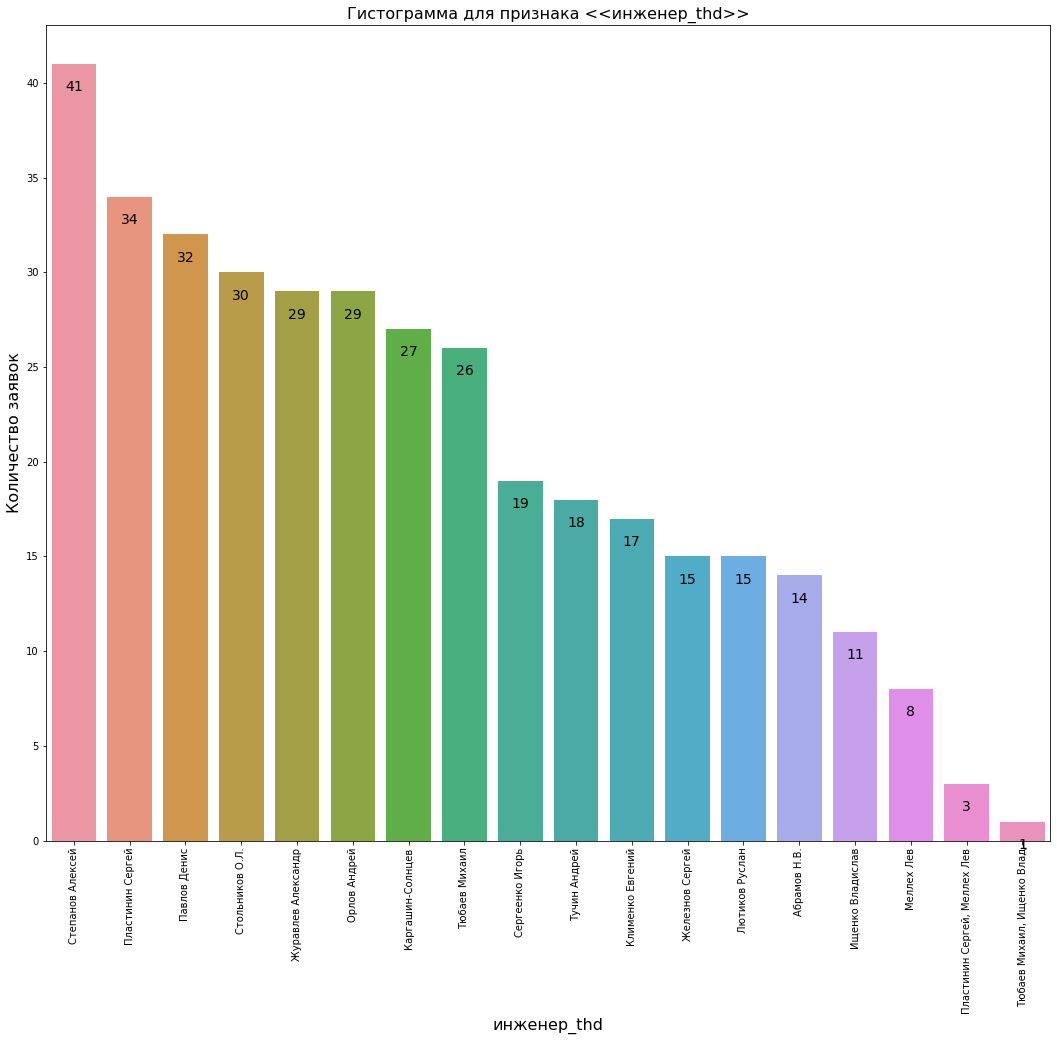

In [ ]:
plt.subplots(figsize = (18, 15), sharex=True)
ax=sns.countplot(x=df['инженер_thd'], data=df, order=df['инженер_thd'].value_counts().index);
plt.xlabel('инженер_thd', fontsize = 16)
plt.ylabel('Количество заявок', fontsize = 16)
plt.title('Гистограмма для признака <<инженер_thd>>', fontsize = 16)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()),  ha='center', va='top', color='black', size=14)
plt.savefig('my_plotbad.jpg', dpi = 300)

$\blacktriangleright$ пропуски в таблице

In [ ]:
df.isna().sum()

дата_заявки                                       0
тип_заявки                                        0
автор_заявки_                                     6
заявка_через_дежурного_или_инженеру_напрямую     57
ответственный_механик                            36
инженер_по_сервису                               30
инженер_thd                                       0
производитель                                    18
номер_оборудования                               55
город                                             7
тема_заявки                                       2
состояние_заявки                                 16
удаленная_поддержка                             123
дата_закрытия                                    60
дата_заявки1                                      0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


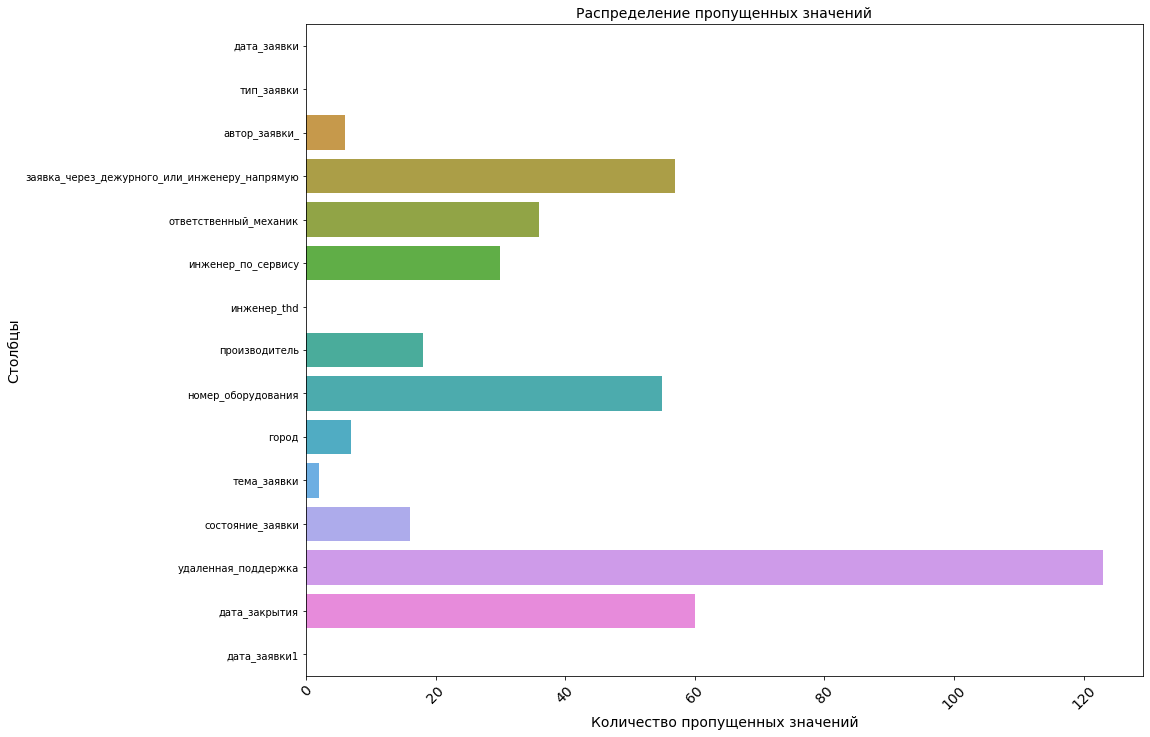

In [ ]:
miss_val = pd.DataFrame((df.isna().sum())).reset_index()
plt.subplots(figsize = (15, 12), sharex=True)
ax = sns.barplot(0,'index', data = miss_val)
plt.xticks(rotation = 45,fontsize = 14);
plt.title("Распределение пропущенных значений", fontsize = 14);
plt.ylabel("Столбцы", fontsize = 14);
plt.xlabel("Количество пропущенных значений", fontsize = 14);
#for p in ax.patches:
    #ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black', size=11)
plt.savefig('my_isna.jpg', dpi = 500)


In [ ]:
df.loc[df['инженер_thd']=='  Лютиков руслан ', 'инженер_thd'] = 'Лютиков Руслан'

In [ ]:
df.loc[df['инженер_thd']=='Ищенко Владислав', 'инженер_thd'] = 'Ищенко В.А.'

In [ ]:
df.loc[df['инженер_thd']=='Денис Павлов', 'инженер_thd'] = 'Павлов Денис'

In [ ]:
df.loc[df['инженер_thd']=='Каргашин-Солнцев ', 'инженер_thd'] = 'Каргашин-Солнцев'

In [ ]:
df.loc[df['инженер_thd']=='Клименко Е', 'инженер_thd'] = 'Клименко Евгений'

In [ ]:
df.инженер_thd.value_counts()

Степанов Алексей                41
Пластинин Сергей                34
Павлов Денис                    32
Стольников О.Л.                 30
Журавлев Александр              29
Орлов Андрей                    29
Каргашин-Солнцев                27
Тюбаев Михаил                   26
Сергеенко Игорь                 19
Тучин Андрей                    18
Клименко Евгений                17
Железнов Сергей                 15
Лютиков Руслан                  15
Абрамов Н.В.                    14
Ищенко В.А.                     11
Меллех Лев                       8
Пластинин Сергей, Меллех Лев     3
Тюбаев Михаил, Ищенко Влад       1
Name: инженер_thd, dtype: int64

In [ ]:
#df1 = df.sort_values(df.инженер_thd.value_counts(), ascending=False)
#df1

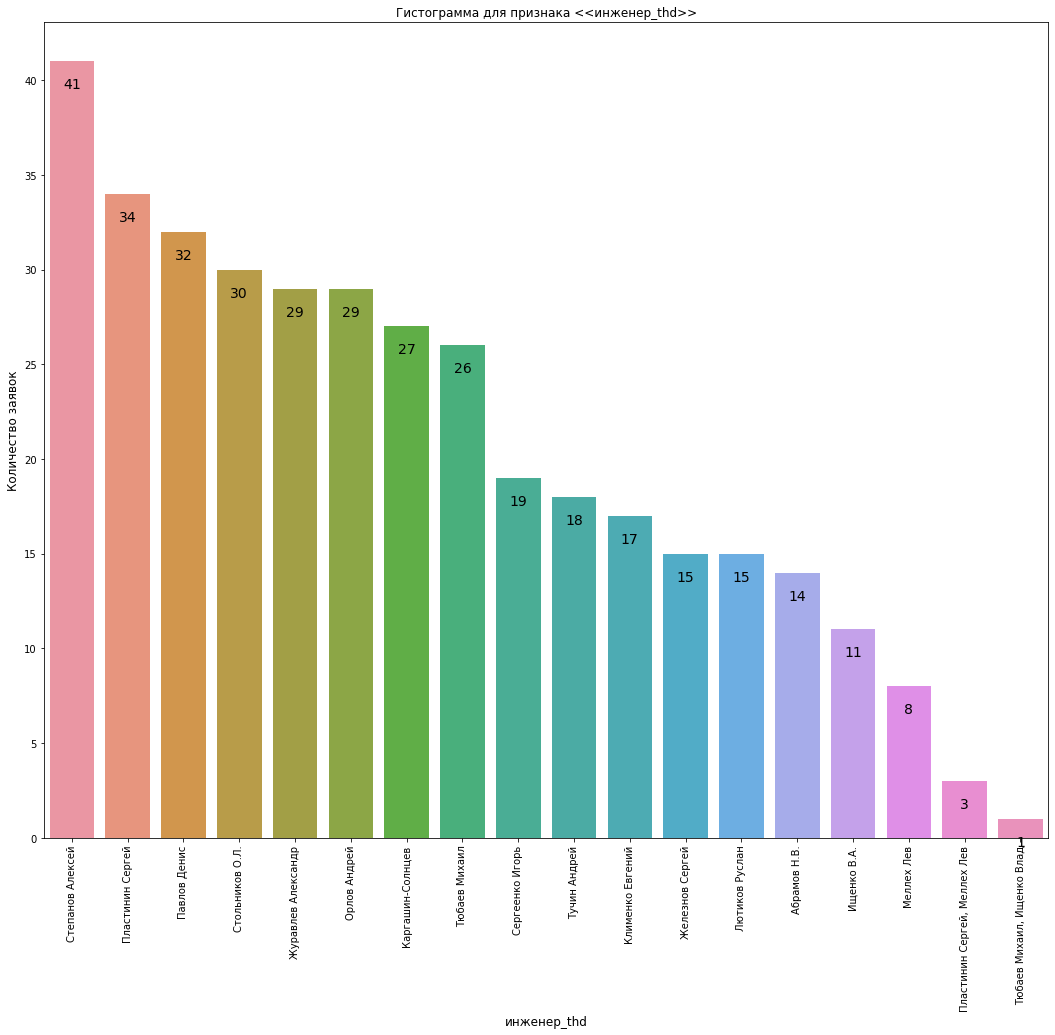

In [ ]:
plt.subplots(figsize = (18, 15), sharex=True)
ax=sns.countplot(x=df['инженер_thd'], data=df, order=df['инженер_thd'].value_counts().index);
plt.xlabel('инженер_thd', fontsize = 12)
plt.ylabel('Количество заявок', fontsize = 12)
plt.title('Гистограмма для признака <<инженер_thd>>')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()),  ha='center', va='top', color='black', size=14)
plt.savefig('my_plot.jpg', dpi = 300)

$\blacktriangleright$ Канал получения заявок

In [ ]:
col_cat = ['тип_заявки']
for col in col_cat:
    print('--------{}----'.format(col))
    print(df[col].unique())
    print('--------{}----'.format(col))

--------тип_заявки----
['почта' 'телефон ' 'телефон' 'Телефон    Лютиков Р.А.' '\nтелефон'
 'Телефон' 'Почта' 'не заполнено' 'Телефон     Лютиков Р.А' 'лично'
 'Телефон     Лютиков Р.А.' 'Офис' 'не внесено' 'телефон     Лютиков Р.А.']
--------тип_заявки----


In [ ]:
df.тип_заявки.value_counts()

телефон                     173
почта                        69
телефон                      52
Телефон                      47
не заполнено                  8
Почта                         6
лично                         4
Офис                          3
телефон     Лютиков Р.А.      2
Телефон    Лютиков Р.А.       1
\nтелефон                     1
Телефон     Лютиков Р.А       1
Телефон     Лютиков Р.А.      1
не внесено                    1
Name: тип_заявки, dtype: int64

In [ ]:
df.loc[df['тип_заявки']=='телефон ', 'тип_заявки'] = 'телефон'

In [ ]:
df.loc[df['тип_заявки']=='Телефон    Лютиков Р.А.', 'тип_заявки'] = 'телефон'

In [ ]:
df.loc[df['тип_заявки']=='\nтелефон', 'тип_заявки'] = 'телефон'

In [ ]:
df.loc[df['тип_заявки']=='Телефон', 'тип_заявки'] = 'телефон'

In [ ]:
df.loc[df['тип_заявки']=='Телефон     Лютиков Р.А', 'тип_заявки'] = 'телефон'

In [ ]:
df.loc[df['тип_заявки']=='Телефон     Лютиков Р.А.', 'тип_заявки'] = 'телефон'

In [ ]:
df.loc[df['тип_заявки']=='телефон     Лютиков Р.А.', 'тип_заявки'] = 'телефон'

In [ ]:
df.loc[df['тип_заявки']=='Почта', 'тип_заявки'] = 'почта'

In [ ]:
df.loc[df['тип_заявки']=='не внесено', 'тип_заявки'] = 'не заполнено'

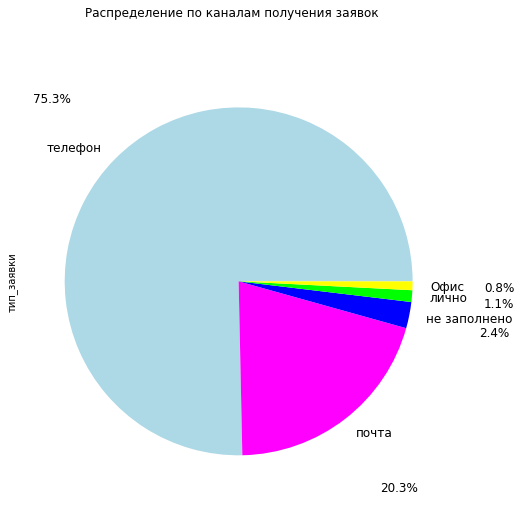

In [ ]:
df.тип_заявки.value_counts().plot(kind='pie', subplots=True, autopct='%.1f%%', pctdistance=1.5, radius=1, figsize = (8,8),
colors = ['lightblue', 'magenta', 'blue', 'lime','yellow'],
title='Распределение по каналам получения заявок', fontsize = 12)
plt.savefig('my_canal.jpg', dpi = 300)

$\blacktriangleright$ Способы получения заявок

In [ ]:
col_cat = ['заявка_через_дежурного_или_инженеру_напрямую']
for col in col_cat:
    print('--------{}----'.format(col))
    print(df[col].unique())
    print('--------{}----'.format(col))

--------заявка_через_дежурного_или_инженеру_напрямую----
[nan 'инженеру' 'дежурному' 'Инженер' 'Дежурному' 'Дежурный' 'Инженеру'
 'Механик' 'Механик ' 'инженер' 'Евсеев Василий' 'механик' 'дежурный'
 'Механик.' 'напрямую' 'Напрямую' '   - ' 'Дежурного' 'Дежурный.']
--------заявка_через_дежурного_или_инженеру_напрямую----


In [ ]:
df.заявка_через_дежурного_или_инженеру_напрямую.value_counts()

Инженер           68
Механик           60
Дежурный          48
инженер           25
Механик           17
механик           17
дежурный          17
инженеру          16
Инженеру          15
дежурному         12
Напрямую           4
Дежурному          3
   -               3
Механик.           2
напрямую           2
Дежурного          1
Евсеев Василий     1
Дежурный.          1
Name: заявка_через_дежурного_или_инженеру_напрямую, dtype: int64

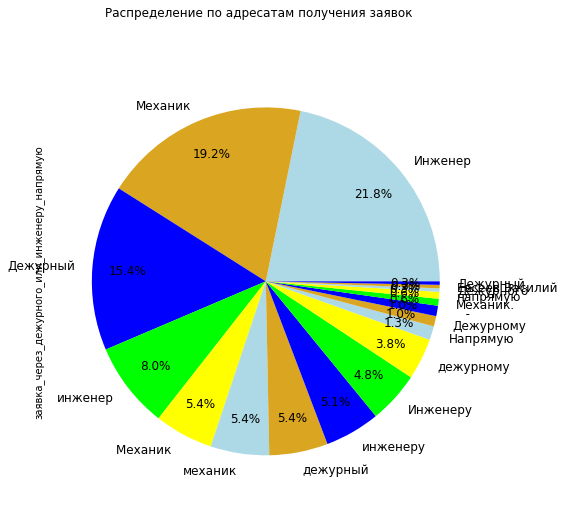

In [ ]:
df.заявка_через_дежурного_или_инженеру_напрямую.value_counts().plot(kind='pie', subplots=True, autopct='%.1f%%', pctdistance=0.8, radius=1, figsize = (8,8),
colors = ['lightblue', 'goldenrod', 'blue', 'lime','yellow'],
title='Распределение по адресатам получения заявок', fontsize = 12)
plt.savefig('my_engineerbad.jpg', dpi = 300)

In [ ]:
df.loc[df['заявка_через_дежурного_или_инженеру_напрямую']=='инженеру', 'заявка_через_дежурного_или_инженеру_напрямую'] = 'Инженер'

In [ ]:
df.loc[df['заявка_через_дежурного_или_инженеру_напрямую']=='Инженеру', 'заявка_через_дежурного_или_инженеру_напрямую'] = 'Инженер'

In [ ]:
df.loc[df['заявка_через_дежурного_или_инженеру_напрямую']=='инженер', 'заявка_через_дежурного_или_инженеру_напрямую'] = 'Инженер'

In [ ]:
df.loc[df['заявка_через_дежурного_или_инженеру_напрямую']=='механик', 'заявка_через_дежурного_или_инженеру_напрямую'] = 'Механик'

In [ ]:
df.loc[df['заявка_через_дежурного_или_инженеру_напрямую']=='Механик ', 'заявка_через_дежурного_или_инженеру_напрямую'] = 'Механик'

In [ ]:
df.loc[df['заявка_через_дежурного_или_инженеру_напрямую']=='Евсеев Василий', 'заявка_через_дежурного_или_инженеру_напрямую'] = 'Механик'

In [ ]:
df.loc[df['заявка_через_дежурного_или_инженеру_напрямую']=='Механик.', 'заявка_через_дежурного_или_инженеру_напрямую'] = 'Механик'

In [ ]:
df.loc[df['заявка_через_дежурного_или_инженеру_напрямую']=='дежурному', 'заявка_через_дежурного_или_инженеру_напрямую'] = 'Дежурный'

In [ ]:
df.loc[df['заявка_через_дежурного_или_инженеру_напрямую']=='Дежурному', 'заявка_через_дежурного_или_инженеру_напрямую'] = 'Дежурный'

In [ ]:
df.loc[df['заявка_через_дежурного_или_инженеру_напрямую']=='Дежурного', 'заявка_через_дежурного_или_инженеру_напрямую'] = 'Дежурный'

In [ ]:
df.loc[df['заявка_через_дежурного_или_инженеру_напрямую']=='Дежурный.', 'заявка_через_дежурного_или_инженеру_напрямую'] = 'Дежурный'

In [ ]:
df.loc[df['заявка_через_дежурного_или_инженеру_напрямую']=='дежурный', 'заявка_через_дежурного_или_инженеру_напрямую'] = 'Дежурный'

In [ ]:
df.loc[df['заявка_через_дежурного_или_инженеру_напрямую']=='напрямую', 'заявка_через_дежурного_или_инженеру_напрямую'] = 'Напрямую'

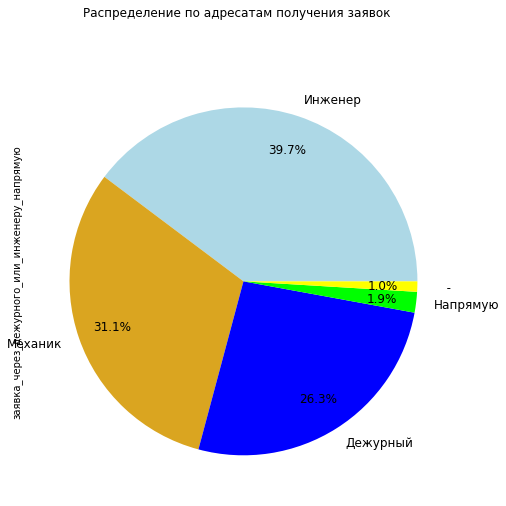

In [ ]:
df.заявка_через_дежурного_или_инженеру_напрямую.value_counts().plot(kind='pie', subplots=True, autopct='%.1f%%', pctdistance=0.8, radius=1, figsize = (8,8),
colors = ['lightblue', 'goldenrod', 'blue', 'lime','yellow'],
title='Распределение по адресатам получения заявок', fontsize = 12)
plt.savefig('my_engineer.jpg', dpi = 300)

$\blacktriangleright$ Распределение заявок по городам

In [ ]:
col_cat = ['город']
for col in col_cat:
    print('--------{}----'.format(col))
    print(df[col].unique())
    print('--------{}----'.format(col))

--------город----
['Москва' 'МО, г. Раменское' 'Волгоград' 'Санкт - Петербург'
 'Екатеринбург' 'Ростов на Дону' 'Москва ' 'Ростов-на-Дону'
 'Санкт-Петербург' 'Сочи' 'Санкт -Петербург' 'Санкт Петербург' 'С-Пб'
 'Царская 10' 'Костомукша' 'СПб' 'Тюмень' 'Ростов' 'Сухой Лог' 'Анапа'
 'МО, Одинцовский р-н' 'Санкт- Петербург' 'В-Пышма' nan 'Пермь'
 'Cанкт - Петербург' 'Уфа' 'Москва, Раменское'
 'МО, Одинцовский р-н, с. Усово' 'москва']
--------город----


In [ ]:
df.город.value_counts()

Москва                           89
Санкт-Петербург                  81
Санкт - Петербург                46
С-Пб                             29
Сочи                             27
Екатеринбург                     25
МО, г. Раменское                 18
СПб                               7
Москва                            6
Санкт Петербург                   5
Уфа                               4
Ростов                            3
Ростов-на-Дону                    3
Санкт -Петербург                  2
Ростов на Дону                    2
Волгоград                         2
МО, Одинцовский р-н, с. Усово     1
В-Пышма                           1
Москва, Раменское                 1
Cанкт - Петербург                 1
Пермь                             1
Костомукша                        1
Санкт- Петербург                  1
МО, Одинцовский р-н               1
Анапа                             1
Сухой Лог                         1
Тюмень                            1
Царская 10                  

In [ ]:
df2=df.город.value_counts().loc[lambda x : x > 0].to_frame()
df2

,город
Москва,89
Санкт-Петербург,81
Санкт - Петербург,46
С-Пб,29
Сочи,27
Екатеринбург,25
"МО, г. Раменское",18
СПб,7
Москва,6
Санкт Петербург,5


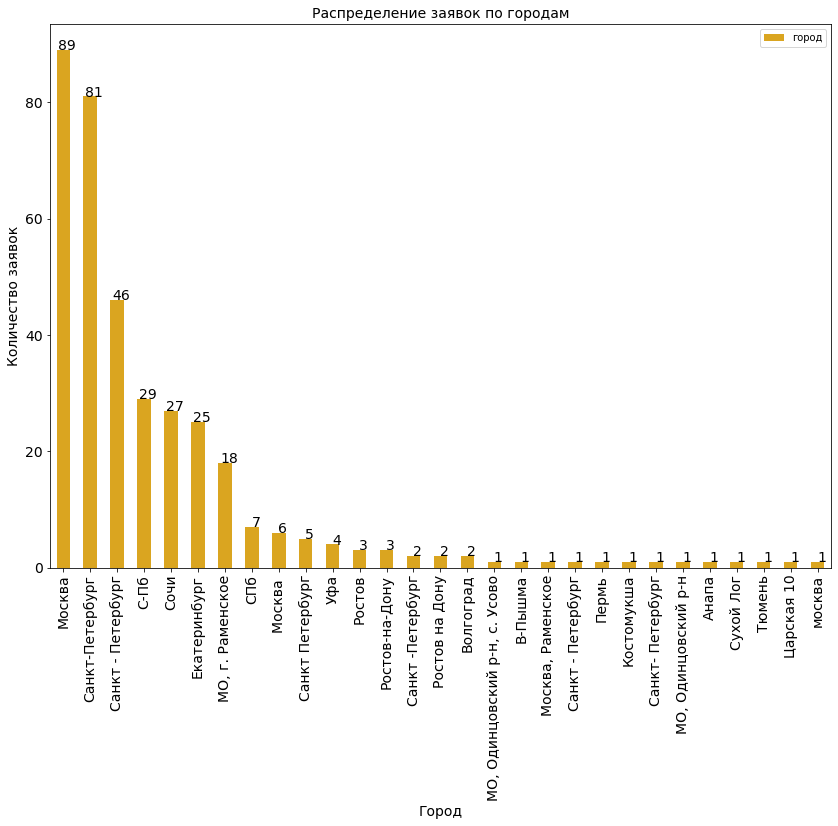

In [ ]:
#color_rectangle = np.random.rand(14, 3) 
ax = df2.plot(kind='bar', color = 'goldenrod', sharex=True, fontsize = 14, figsize=(14,10))
plt.title('Распределение заявок по городам', fontsize=14)
plt.xlabel('Город', fontsize = 14)
plt.ylabel('Количество заявок', fontsize = 14)
#ax.set_facecolor('seashell')  
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black', size=14)
plt.savefig('gorodbad.jpg', dpi = 500)

In [ ]:
df.loc[df['город']=='москва', 'город'] = 'Москва'

In [ ]:
df.loc[df['город']=='Москва ', 'город'] = 'Москва'

In [ ]:
df.loc[df['город']=='Москва, Раменское', 'город'] = 'МО'
df.loc[df['город']=='МO, Раменское', 'город'] = 'МО'
df.loc[df['город']=='МО, Одинцовский р-н', 'город'] = 'МО'
df.loc[df['город']=='МО, Одинцовский р-н, с. Усово', 'город'] = 'МО'
df.loc[df['город']=='МО', 'город'] = 'МO'
df.loc[df['город']=='МО, г. Раменское', 'город'] = 'МO'


In [ ]:
df.loc[df['город']=='Санкт - Петербург', 'город'] = 'Санкт-Петербург'
df.loc[df['город']=='Санкт -Петербург', 'город'] = 'Санкт-Петербург'
df.loc[df['город']=='Санкт Петербург', 'город'] = 'Санкт-Петербург'
df.loc[df['город']=='С-Пб', 'город'] = 'Санкт-Петербург'
df.loc[df['город']=='Санкт- Петербург', 'город'] = 'Санкт-Петербург'
df.loc[df['город']=='Cанкт - Петербург', 'город'] = 'Санкт-Петербург'
df.loc[df['город']=='СПб', 'город'] = 'Санкт-Петербург'


In [ ]:
df.loc[df['город']=='Ростов на Дону', 'город'] = 'Ростов-на-Дону'
df.loc[df['город']=='Ростов', 'город'] = 'Ростов-на-Дону'

In [ ]:
df.loc[df['город']=='Царская 10', 'город'] = 'Екатеринбург'

In [ ]:
df.город.value_counts()

Санкт-Петербург    172
Москва              96
Сочи                27
Екатеринбург        26
МO                  21
Ростов-на-Дону       8
Уфа                  4
Волгоград            2
Костомукша           1
Тюмень               1
Сухой Лог            1
Анапа                1
В-Пышма              1
Пермь                1
Name: город, dtype: int64

In [ ]:
df1=df.город.value_counts().loc[lambda x : x > 0].to_frame()
df1

,город
Санкт-Петербург,172
Москва,96
Сочи,27
Екатеринбург,26
МO,21
Ростов-на-Дону,8
Уфа,4
Волгоград,2
Костомукша,1
Тюмень,1


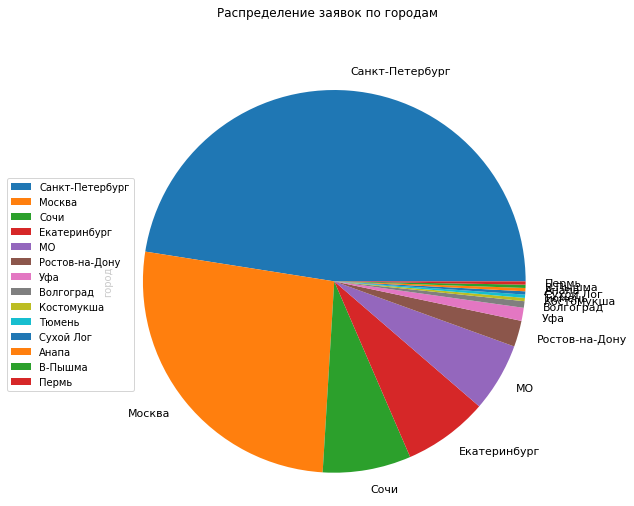

In [ ]:
total = sum(df1['город'])
#labels = [f"{n} ({v/total:.1%})" for n,v in df1]
df1.plot(kind='pie', subplots=True, radius=1.1, pctdistance=0.8, figsize = (8,8),
title='Распределение заявок по городам', fontsize =11)
plt.legend(
    bbox_to_anchor = (-0.2, 0.5, 0.25, 0.25),
    loc = 'best')


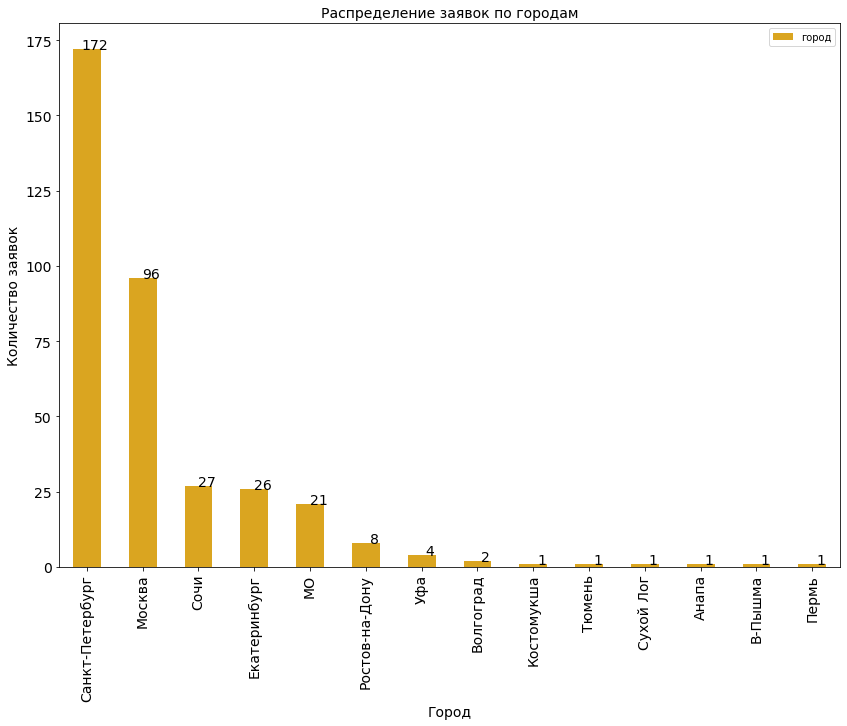

In [ ]:
#color_rectangle = np.random.rand(14, 3) 
ax = df1.plot(kind='bar', color = 'goldenrod', sharex=True, fontsize = 14, figsize=(14,10))
plt.title('Распределение заявок по городам', fontsize=14)
plt.xlabel('Город', fontsize = 14)
plt.ylabel('Количество заявок', fontsize = 14)
#ax.set_facecolor('seashell')  
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black', size=14)
plt.savefig('gorod.jpg', dpi = 500)

$\blacktriangleright$ Удаленная поддержка

In [ ]:
df.удаленная_поддержка.value_counts()

Нет     75
нет     68
да      61
Нет.    30
Да      10
Да.      1
нет.     1
Name: удаленная_поддержка, dtype: int64

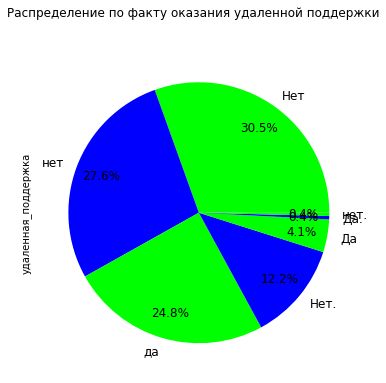

In [ ]:
df.удаленная_поддержка.value_counts().plot(kind='pie', subplots=True, autopct='%.1f%%', pctdistance=0.8, radius=1, figsize = (6,6),
colors = ['lime', 'blue'],
title='Распределение по факту оказания удаленной поддержки', fontsize = 12)
plt.savefig('supportbad.jpg',dpi = 300)

In [ ]:
df.loc[df['удаленная_поддержка']=='нет', 'удаленная_поддержка'] = 'Нет'
df.loc[df['удаленная_поддержка']=='нет.', 'удаленная_поддержка'] = 'Нет'
df.loc[df['удаленная_поддержка']=='Нет.', 'удаленная_поддержка'] = 'Нет'
df.loc[df['удаленная_поддержка']=='да', 'удаленная_поддержка'] = 'Да'
df.loc[df['удаленная_поддержка']=='Да.', 'удаленная_поддержка'] = 'Да'
df.loc[df['удаленная_поддержка']=='да', 'удаленная_поддержка'] = 'Да'

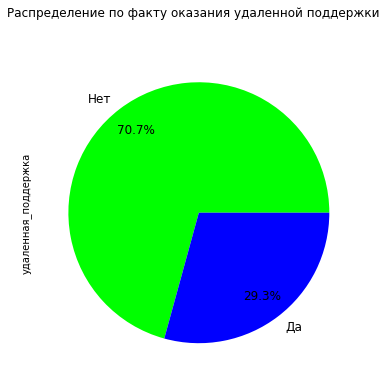

In [ ]:
df.удаленная_поддержка.value_counts().plot(kind='pie', subplots=True, autopct='%.1f%%', pctdistance=0.8, radius=1, figsize = (6,6),
colors = ['lime', 'blue'],
title='Распределение по факту оказания удаленной поддержки', fontsize = 12)
plt.savefig('support.jpg', dpi = 300)

$\blacktriangleright$ Заявки в разрезе оборудования

In [ ]:
df.номер_оборудования.value_counts()

44610529    3
10939564    3
42950137    3
43203886    2
B7NS4400    2
           ..
40340547    1
40340544    1
40340539    1
40340538    1
43357000    1
Name: номер_оборудования, Length: 291, dtype: int64

In [ ]:
df.производитель.value_counts().sum()

351

In [ ]:
df.производитель.value_counts()

KONE                178
КОНЕ                 42
Kone                 14
КONE                 11
Коне                 10
OTIS                 10
МЛЗ                   8
УЛ.                   7
Orona                 6
Schindler             6
ОТИС                  5
Kone                  4
Otis                  3
ЩЛЗ                   3
Обь                   3
THYSSEN               3
УЛ                    2
Релейный              2
ARKEL                 2
УЛ ПУ-3               2
ЕЛМ                   2
Релейный.             2
—                     2
АСУД                  2
Елинк                 1
BLT                   1
УЛ ПУ-3.              1
Monarch               1
kone                  1
КМЗ                   1
Отечеств.             1
ШУЛК                  1
PERRE                 1
Canny                 1
Самара                1
УПЛ-17                1
Инв. подъем           1
Thyssen Гуливер       1
LM                    1
ШУЛМ                  1
KoNE                  1
KONE KCE        

In [ ]:
col_cat = ['производитель']
for col in col_cat:
    print('--------{}----'.format(col))
    print(df[col].unique())
    print('--------{}----'.format(col))

--------производитель----
['KONE' 'ЩЛЗ' 'OTIS' 'УЛ.' nan 'МЛЗ' 'PERRE' 'Schindler' 'КONE' 'Kone'
 'КОНЕ' 'Thyssen' 'Otis XIZI' 'Релейный.' 'THYSSEN' 'УЛ' 'Otis' 'ЕЛМ'
 'Hidral MIH' 'Orona' 'KONE KCE' 'KoNE' 'ШУЛМ' 'ОТИС' 'УЛЖ-10' 'Kone '
 'Обь' 'LM' 'Thyssen Гуливер ' 'ARKEL' 'Инв. подъем' 'УПЛ-17' 'Самара'
 'Canny' 'Отечеств.' 'АСУД' 'Релейный' 'ШУЛК' 'КМЗ' 'kone' 'Елинк' 'BLT'
 'УЛ ПУ-3.' '—' 'УЛ ПУ-3' 'Monarch' 'Коне']
--------производитель----


In [ ]:
df.loc[df['производитель']=='КОНЕ', 'производитель'] = 'KONE'
df.loc[df['производитель']=='КONE', 'производитель'] = 'KONE'
df.loc[df['производитель']=='Kone', 'производитель'] = 'KONE'
df.loc[df['производитель']=='KoNE', 'производитель'] = 'KONE'
df.loc[df['производитель']=='kone', 'производитель'] = 'KONE'
df.loc[df['производитель']=='Kone ', 'производитель'] = 'KONE'
df.loc[df['производитель']=='Коне', 'производитель'] = 'KONE'
df.loc[df['производитель']=='KONE KCE', 'производитель'] = 'KONE'

In [ ]:
df.loc[df['производитель']=='Otis', 'производитель'] = 'OTIS'
df.loc[df['производитель']=='ОТИС', 'производитель'] = 'OTIS'
df.loc[df['производитель']=='Otis XIZI', 'производитель'] = 'OTIS'

In [ ]:
df.loc[df['производитель']=='Thyssen', 'производитель'] = 'THYSSEN'
df.loc[df['производитель']=='Thyssen Гуливер ', 'производитель'] = 'THYSSEN'

In [ ]:
df.loc[df['производитель']=='ЩЛЗ', 'производитель'] = 'Отечественные'
df.loc[df['производитель']=='УЛ.', 'производитель'] = 'Отечественные'
df.loc[df['производитель']=='МЛЗ', 'производитель'] = 'Отечественные'
df.loc[df['производитель']=='Релейный.', 'производитель'] = 'Отечественные'
df.loc[df['производитель']=='УЛ', 'производитель'] = 'Отечественные'
df.loc[df['производитель']=='ЕЛМ', 'производитель'] = 'Отечественные'
df.loc[df['производитель']=='ШУЛМ', 'производитель'] = 'Отечественные'
df.loc[df['производитель']=='УЛЖ-10', 'производитель'] = 'Отечественные'
df.loc[df['производитель']=='УПЛ-17', 'производитель'] = 'Отечественные'
df.loc[df['производитель']=='Самара', 'производитель'] = 'Отечественные'
df.loc[df['производитель']=='Релейный', 'производитель'] = 'Отечественные'
df.loc[df['производитель']=='ШУЛК', 'производитель'] = 'Отечественные'
df.loc[df['производитель']=='КМЗ', 'производитель'] = 'Отечественные'
df.loc[df['производитель']=='УЛ ПУ-3.', 'производитель'] = 'Отечественные'
df.loc[df['производитель']=='УЛ ПУ-3', 'производитель'] = 'Отечественные'
df.loc[df['производитель']=='Отечеств.', 'производитель'] = 'Отечественные'

In [ ]:
lift_describe = df.groupby('производитель')['инженер_thd'].count().reset_index() 
lift_describe.sum()              

производитель    ARKELBLTCannyHidral MIHKONELMMonarchOTISOronaP...
инженер_thd                                                    351
dtype: object

In [ ]:
lift_describe1 = df.groupby('производитель')['инженер_thd'].agg(count='count').reset_index() 
lift_describe1

,производитель,count
0,ARKEL,2
1,BLT,1
2,Canny,1
3,Hidral MIH,1
4,KONE,262
5,LM,1
6,Monarch,1
7,OTIS,19
8,Orona,6
9,PERRE,1


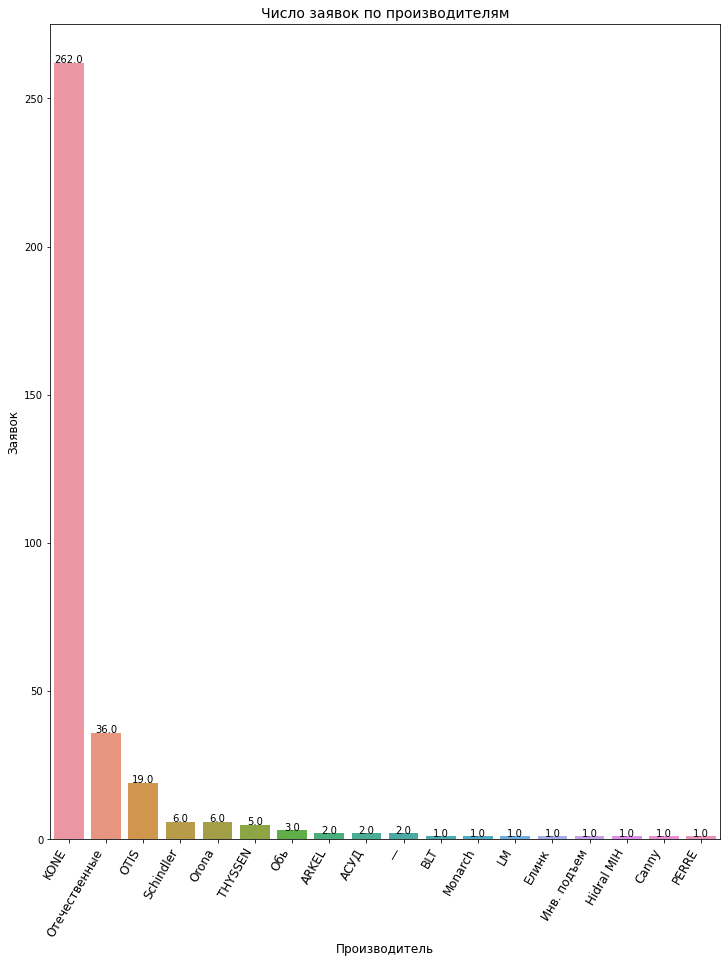

In [ ]:
fig, ax = plt.subplots(figsize = (12,15))
ax=sns.barplot(x = 'производитель', 
               y = 'count', 
               data = lift_describe1.sort_values(by='count', ascending=False),
              )
ax.set_xticklabels(ax.get_xticklabels(), rotation=60,  ha="right", fontsize=12)
ax.set_title('Число заявок по производителям', fontsize=14)
plt.xlabel('Производитель', fontsize=12)
plt.ylabel('Заявок', fontsize=12)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()),  ha='center', color='black', size=10)
plt.savefig('lift.jpg',dpi = 300)


**Выводы**: оформлен Power Point с выводами по датасету.